In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [ ]:
# Base de dados
path = kagglehub.dataset_download("ankushpanday1/india-house-price-prediction")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday1/india-house-price-prediction/versions/1


['india_housing_prices.csv']

In [ ]:
df_india_housing = pd.read_csv(path + "/india_housing_prices.csv")
df_india_housing.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [ ]:
df_india_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [ ]:
df_india_housing.isnull().sum()

,0
ID,0
State,0
City,0
Locality,0
Property_Type,0
BHK,0
Size_in_SqFt,0
Price_in_Lakhs,0
Price_per_SqFt,0
Year_Built,0


In [14]:
#Vamos olhar para os números e gerar uma tabela para saber se temos algum tipo
#de correlação

numeros = df_india_housing.select_dtypes(include=np.number)
corr = numeros.corr()

corr_filtrada = corr.unstack().sort_values(ascending=False)
corr_filtrada = corr_filtrada[(corr_filtrada > 0.7) & (corr_filtrada < 0.9)]

# Exibindo os pares de variáveis e suas correlações
print(corr)

                        ID       BHK  Size_in_SqFt  Price_in_Lakhs  \
ID                1.000000 -0.001718     -0.002293       -0.001636   
BHK              -0.001718  1.000000     -0.001033       -0.000980   
Size_in_SqFt     -0.002293 -0.001033      1.000000       -0.002529   
Price_in_Lakhs   -0.001636 -0.000980     -0.002529        1.000000   
Price_per_SqFt   -0.001344  0.001174     -0.614533        0.555625   
Year_Built        0.002734  0.000917      0.004135        0.002714   
Floor_No         -0.000214  0.001263     -0.002775       -0.001719   
Total_Floors      0.003382 -0.002862     -0.003451        0.001283   
Age_of_Property  -0.002734 -0.000917     -0.004135       -0.002714   
Nearby_Schools   -0.001203 -0.000762      0.001966        0.000155   
Nearby_Hospitals  0.001429  0.001162     -0.001695       -0.002769   

                  Price_per_SqFt  Year_Built  Floor_No  Total_Floors  \
ID                     -0.001344    0.002734 -0.000214      0.003382   
BHK            

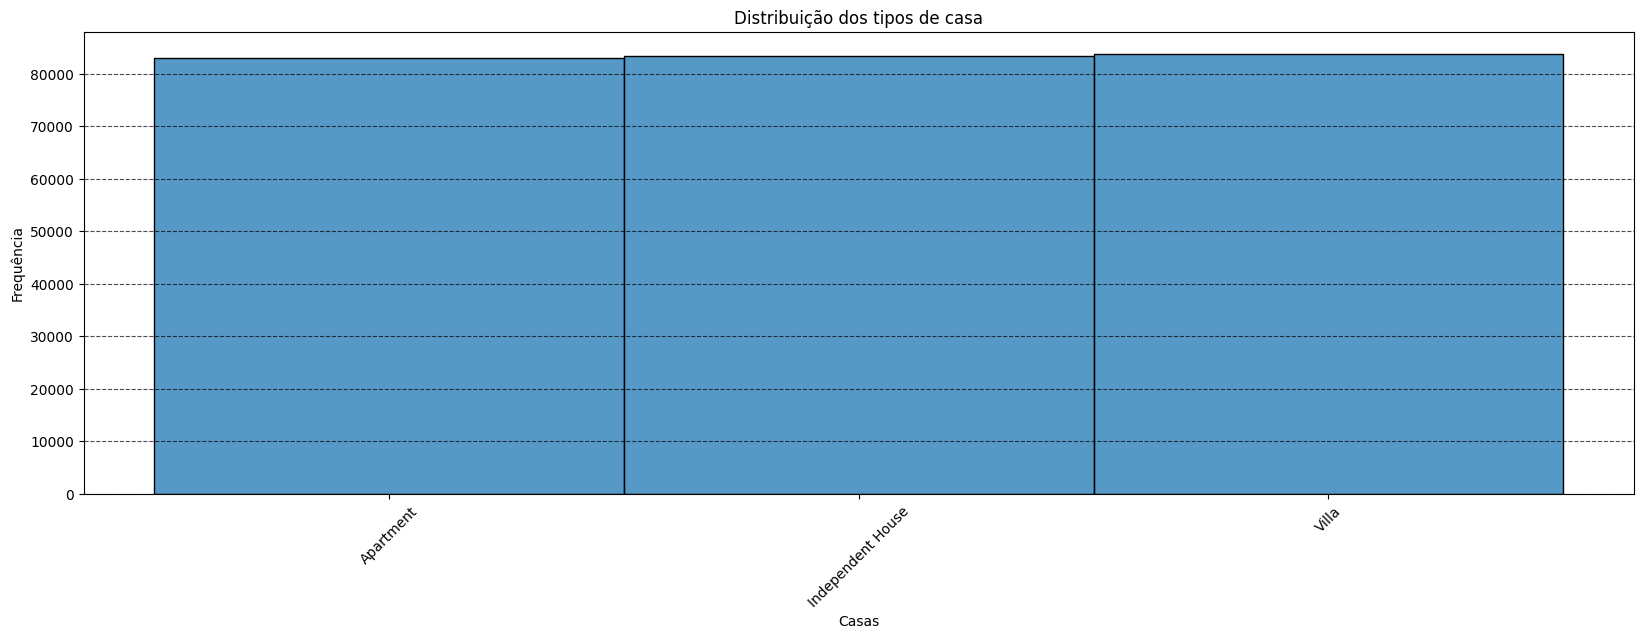

In [17]:
# Gráfico de tipos de residência
plt.figure(figsize=(20, 6))
sns.histplot(df_india_housing['Property_Type'])
plt.title('Distribuição dos tipos de residência')
plt.xlabel('Residência')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', color='black', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

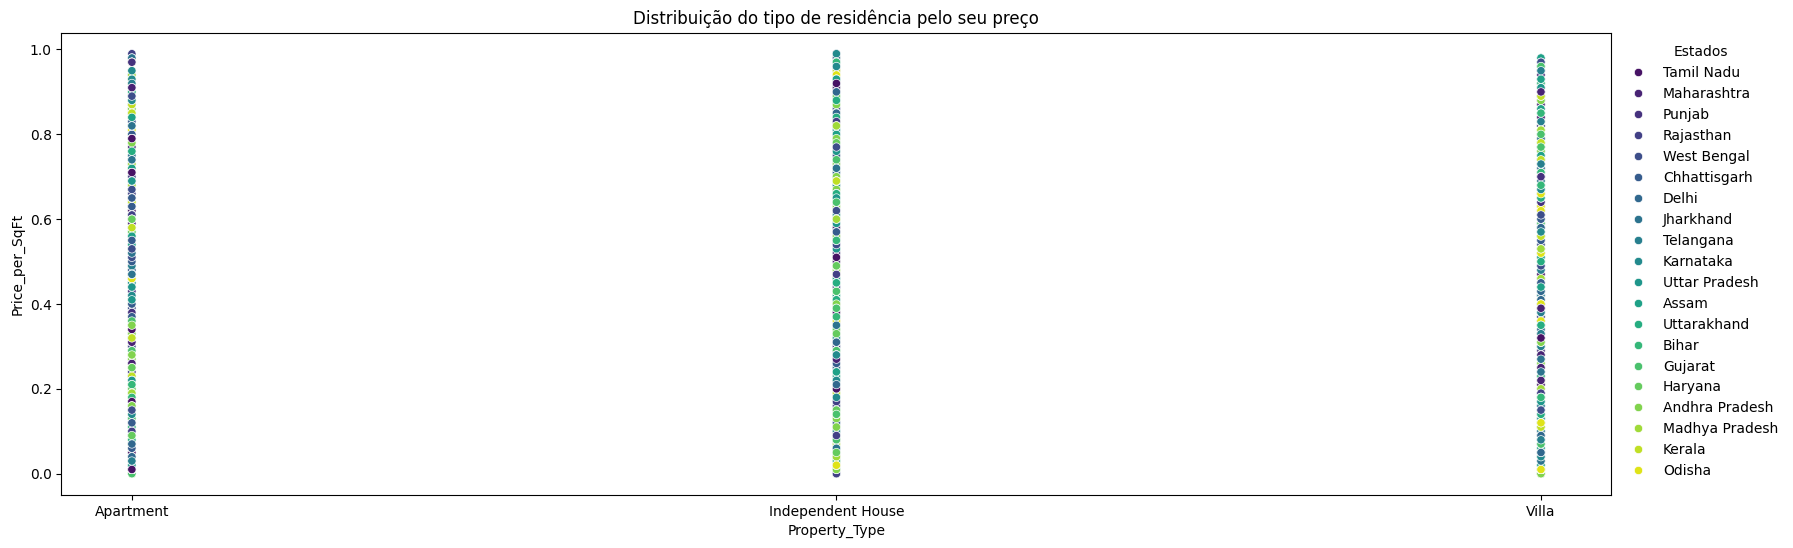

In [19]:
# Verificar a relação entre as variáveis
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_india_housing, x='Property_Type', y='Price_per_SqFt', hue='State', palette='viridis')
plt.title('Distribuição do tipo de residência pelo seu preço')
plt.xlabel('Property_Type')
plt.ylabel('Price_per_SqFt')
plt.legend(title='Estados', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

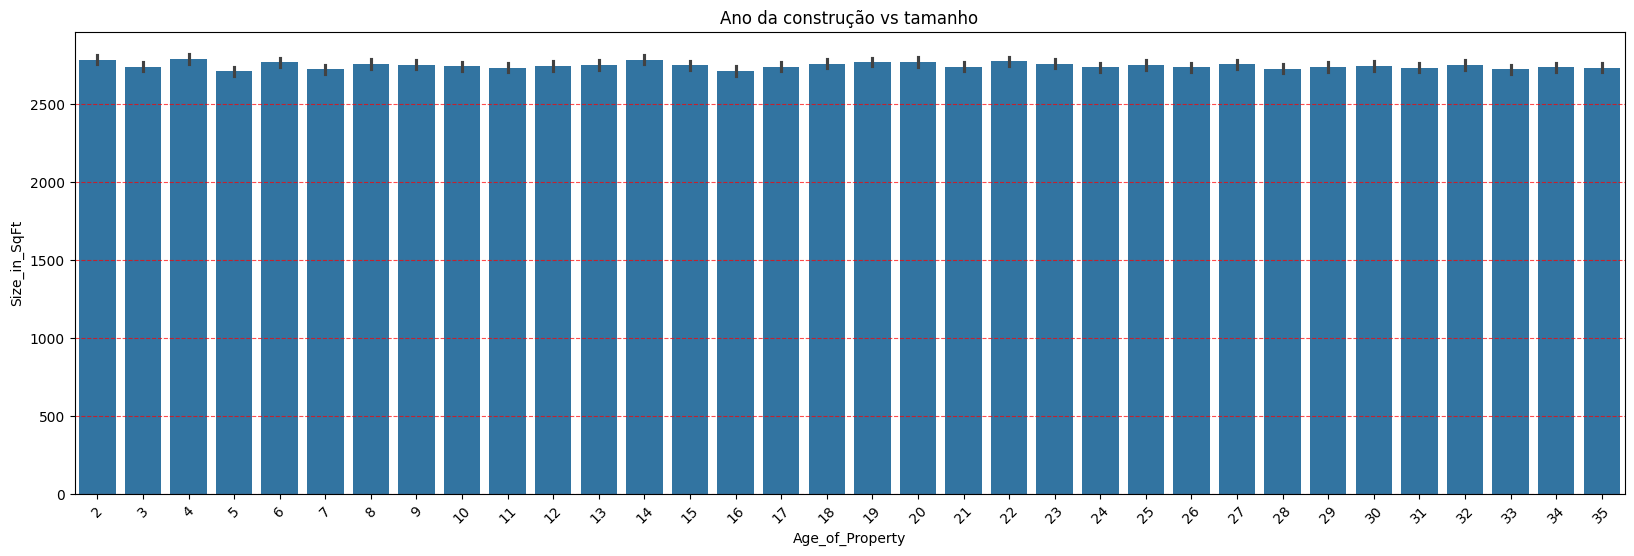

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Age_of_Property', y='Size_in_SqFt', data=df_india_housing)
plt.title('Ano da construção vs tamanho')
plt.xlabel('Age_of_Property')
plt.ylabel('Size_in_SqFt')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color='red', alpha=0.7)
plt.show()

In [21]:
#Preço medio por estado
average_price_per_state = df_india_housing.groupby('State')['Price_in_Lakhs'].mean().sort_values(ascending=False)
print("Average Property Prices Across States:")
print(average_price_per_state)

Average Property Prices Across States:
State
Karnataka         257.408465
Tamil Nadu        256.663684
Uttar Pradesh     256.249920
Madhya Pradesh    255.961459
Gujarat           255.790061
Telangana         255.535173
Andhra Pradesh    255.197870
Bihar             254.919040
Maharashtra       254.706280
Uttarakhand       254.677234
Rajasthan         254.600214
Haryana           254.445784
Kerala            254.367332
West Bengal       254.008640
Jharkhand         253.610145
Odisha            252.838743
Punjab            252.796877
Assam             252.779235
Chhattisgarh      252.676337
Delhi             252.529900
Name: Price_in_Lakhs, dtype: float64


In [22]:
#O tipo mais comum de propriedade
most_common_property_type = df_india_housing['Property_Type'].value_counts()
print("Most Common Property Types:")
print(most_common_property_type)

Most Common Property Types:
Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64


In [23]:
#Os estados maisacessíveis
most_affordable_states = average_price_per_state.sort_values(ascending=True)
print("Most Affordable States:")
print(most_affordable_states)

Most Affordable States:
State
Delhi             252.529900
Chhattisgarh      252.676337
Assam             252.779235
Punjab            252.796877
Odisha            252.838743
Jharkhand         253.610145
West Bengal       254.008640
Kerala            254.367332
Haryana           254.445784
Rajasthan         254.600214
Uttarakhand       254.677234
Maharashtra       254.706280
Bihar             254.919040
Andhra Pradesh    255.197870
Telangana         255.535173
Gujarat           255.790061
Madhya Pradesh    255.961459
Uttar Pradesh     256.249920
Tamil Nadu        256.663684
Karnataka         257.408465
Name: Price_in_Lakhs, dtype: float64


In [24]:
#Distribuição do tipo de proriedade
property_type_distribution = df_india_housing['Property_Type'].value_counts()
print("Property Type Distribution:")
print(property_type_distribution)

Property Type Distribution:
Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64


In [27]:
#Tipo mais comum de quarto, sala e cozinha
most_common_bhk = df_india_housing['BHK'].value_counts().sort_values(ascending=False)
print("Most Common BHK:")
print(most_common_bhk)

Most Common BHK:
BHK
1    50196
5    50134
3    50067
2    49815
4    49788
Name: count, dtype: int64


In [30]:
#Preço médio por cidade
average_price_by_city = df_india_housing.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False)
print("\nAverage Price by City:")
print(average_price_by_city.head())


Average Price by City:
City
Bangalore    258.456639
Surat        258.080467
Kochi        257.415221
Gaya         257.053391
Mangalore    256.920925
Name: Price_in_Lakhs, dtype: float64


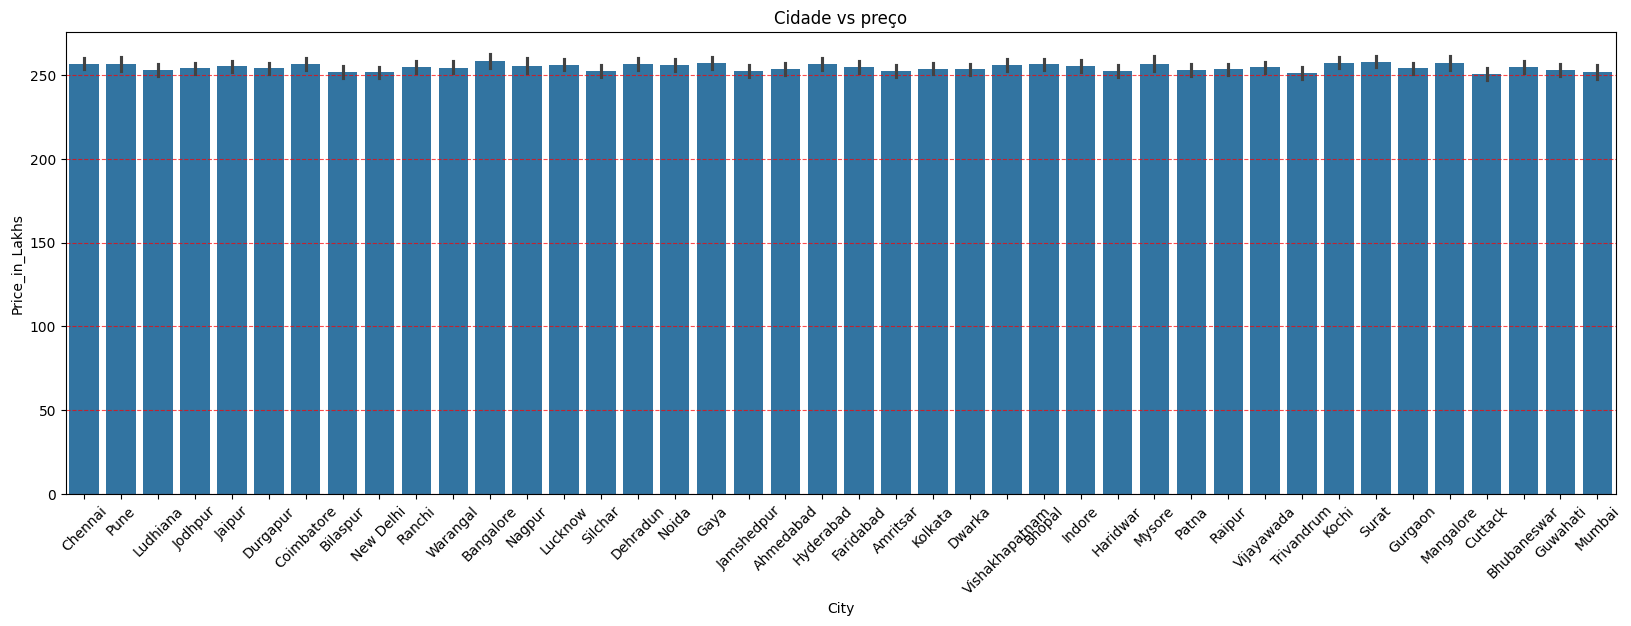

In [35]:
#Gráfico do preço pela cidade
plt.figure(figsize=(20, 6))
sns.barplot(x='City', y='Price_in_Lakhs', data=df_india_housing)
plt.title('Cidade vs preço')
plt.xlabel('City')
plt.ylabel('Price_in_Lakhs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color='red', alpha=0.7)
plt.show()

In [31]:
# Calculando a idade da propriedade (current year is 2025)
df_india_housing['Age_of_Property'] = 2025 - df_india_housing['Year_Built']

# Calculando o preço médio da propriedade por ano
average_price_by_age = df_india_housing.groupby('Age_of_Property')['Price_in_Lakhs'].mean()
print("\nAverage Price by Age of Property:")
print(average_price_by_age)



Average Price by Age of Property:
Age_of_Property
2     254.765609
3     255.298478
4     256.852362
5     256.049844
6     253.777432
7     250.877351
8     255.342148
9     256.910285
10    256.547285
11    253.237633
12    256.917073
13    255.598678
14    252.756039
15    256.050903
16    253.051985
17    254.824216
18    252.730024
19    256.044962
20    255.041661
21    254.477817
22    253.264570
23    257.877590
24    253.969450
25    252.986137
26    252.974484
27    254.400299
28    253.317355
29    254.925321
30    255.695882
31    255.226389
32    252.728207
33    254.178313
34    251.390626
35    255.826016
Name: Price_in_Lakhs, dtype: float64


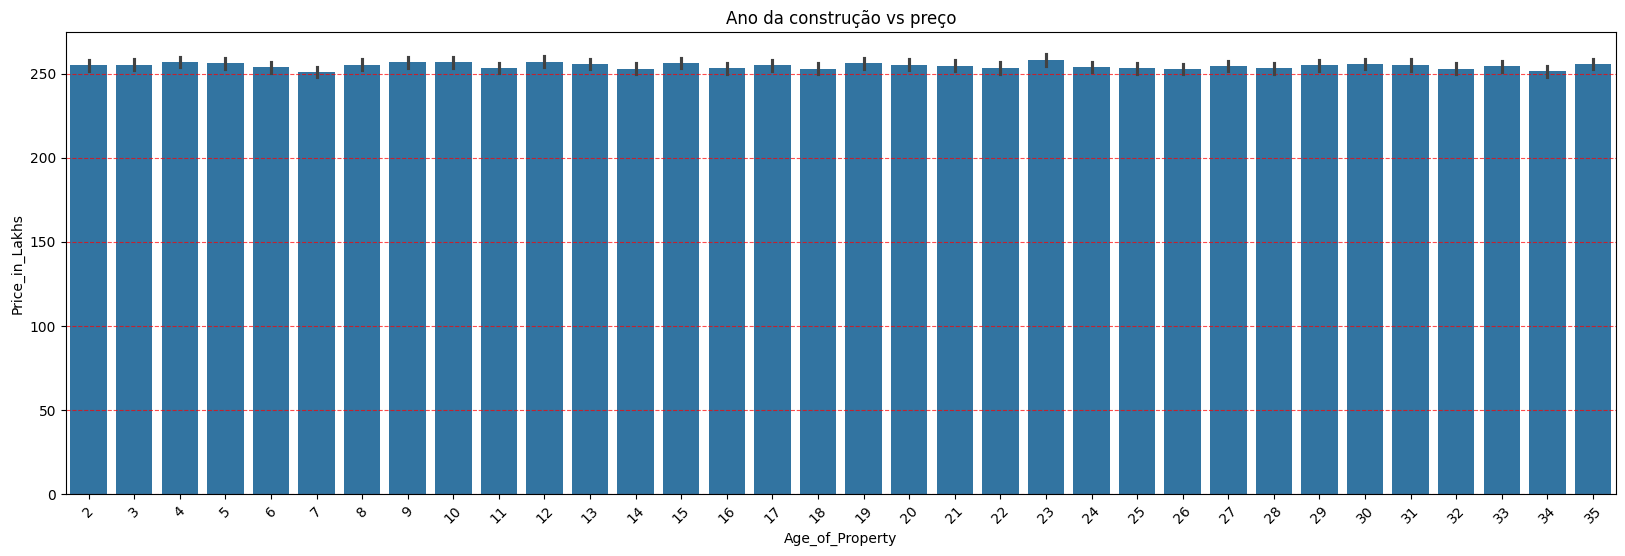

In [32]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Age_of_Property', y='Price_in_Lakhs', data=df_india_housing)
plt.title('Ano da construção vs preço')
plt.xlabel('Age_of_Property')
plt.ylabel('Price_in_Lakhs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color='red', alpha=0.7)
plt.show()